# Integrantes:
### Marcelo Pedral Mota - 202200014355
### Matheus Araujo Pereira - 202100114080
### Gabriel Teixeira Silveira - 202100011987

## Inicialmente resolver imports e o caminho do dataset csv no meu diretório
### _Nesse caso o csv foi guardado num caminho ./datasets/evasao/evasao.csv_

In [295]:
import os
import pandas as pd
import numpy as np
import sklearn as sk

# Resolvendo o caminho para o arquivo csv e guardar em csv_file
base_dir = os.getcwd()
csv_file = os.path.join(base_dir, "datasets", "evasao", "evasao.csv")

# Lendo o CSV
evasao = pd.read_csv(csv_file)

### Agora com o arquivo carregado para entender o problema eu vou analisar as primeiras linhas, e depois analisar informações com relação as colunas

In [296]:
# Imprime as 5 primeiras linhas da tabela
# evasao.head()
# informacoes da tabela
evasao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   curriculum_id                  2603 non-null   int64  
 1   student_id                     2603 non-null   int64  
 2   centro                         2603 non-null   object 
 3   department_name                2603 non-null   object 
 4   course_name                    2603 non-null   object 
 5   student_age_at_initial_period  2603 non-null   int64  
 6   birthday                       2603 non-null   object 
 7   birth_place                    2600 non-null   object 
 8   ingress_form                   2603 non-null   object 
 9   locks_number                   2603 non-null   int64  
 10  required_ch_progress           2603 non-null   float64
 11  optative_ch_progress           2603 non-null   float64
 12  curriculum_status              2603 non-null   o

In [297]:
# Imprime 
# evasao.info()
evasao['leaving_reason'].value_counts()

leaving_reason
ABANDONO                                                                               730
CONCLUÍDO                                                                              329
CANC.. NOVO VESTIBULAR                                                                 143
Transferência Interna                                                                  122
CANCELAMENTO ESPONTÂNEO                                                                 76
DECURSO DE PRAZO MÁXIMO P/ CONCLUSÃO DE CURSO                                           73
Não atendeu à convocação para o Cadastro Específico conforme Edital 21/2017/PROGRAD     35
TRANSF.P/OUTRA IES                                                                       4
CADASTRO CANCELADO                                                                       3
NÃO CONFIRMAÇÃO VÍNCULO                                                                  2
Name: count, dtype: int64

### Primeiro vou verificar as colunas que não são númericas, o python marcar como object mas como vem de um arquivo csv provavelmente são strings, a ideia é entender se são atributos categóricos e realizar transformações

In [298]:
# utilizando values_counts() para quais são os valores e quantas repetições
# evasao['centro'].value_counts()
# evasao['department_name'].value_counts()
# evasao['course_name'].value_counts()
# evasao['birthday'].value_counts()
# evasao['birth_place'].value_counts()
# evasao['ingress_form'].value_counts()
evasao['curriculum_status'].value_counts()
# evasao['leaving_reason'].value_counts()

curriculum_status
CANCELADO                      1188
ATIVO                          1004
CONCLUÍDO                       329
TRANCADO                         61
FORMANDO                         12
Índices Acadêmicos                8
Ano/Período Letivo Inicial:       1
Name: count, dtype: int64

In [299]:
# é possível perceber que os dados são nichados e para reduzir o trabalho vou descartar algumas colunas no momento
evasao_reduzido = evasao.drop(columns=["curriculum_id","student_id","centro", "department_name","birthday", "leaving_reason"])
evasao_reduzido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   course_name                    2603 non-null   object 
 1   student_age_at_initial_period  2603 non-null   int64  
 2   birth_place                    2600 non-null   object 
 3   ingress_form                   2603 non-null   object 
 4   locks_number                   2603 non-null   int64  
 5   required_ch_progress           2603 non-null   float64
 6   optative_ch_progress           2603 non-null   float64
 7   curriculum_status              2603 non-null   object 
 8   mc                             2603 non-null   float64
 9   course_mc                      2603 non-null   float64
 10  iepl                           2603 non-null   float64
 11  course_iepl                    2603 non-null   float64
 12  iech                           2603 non-null   f

<module 'matplotlib' from '/home/motamarcelo/jupyter-env/lib/python3.12/site-packages/matplotlib/__init__.py'>

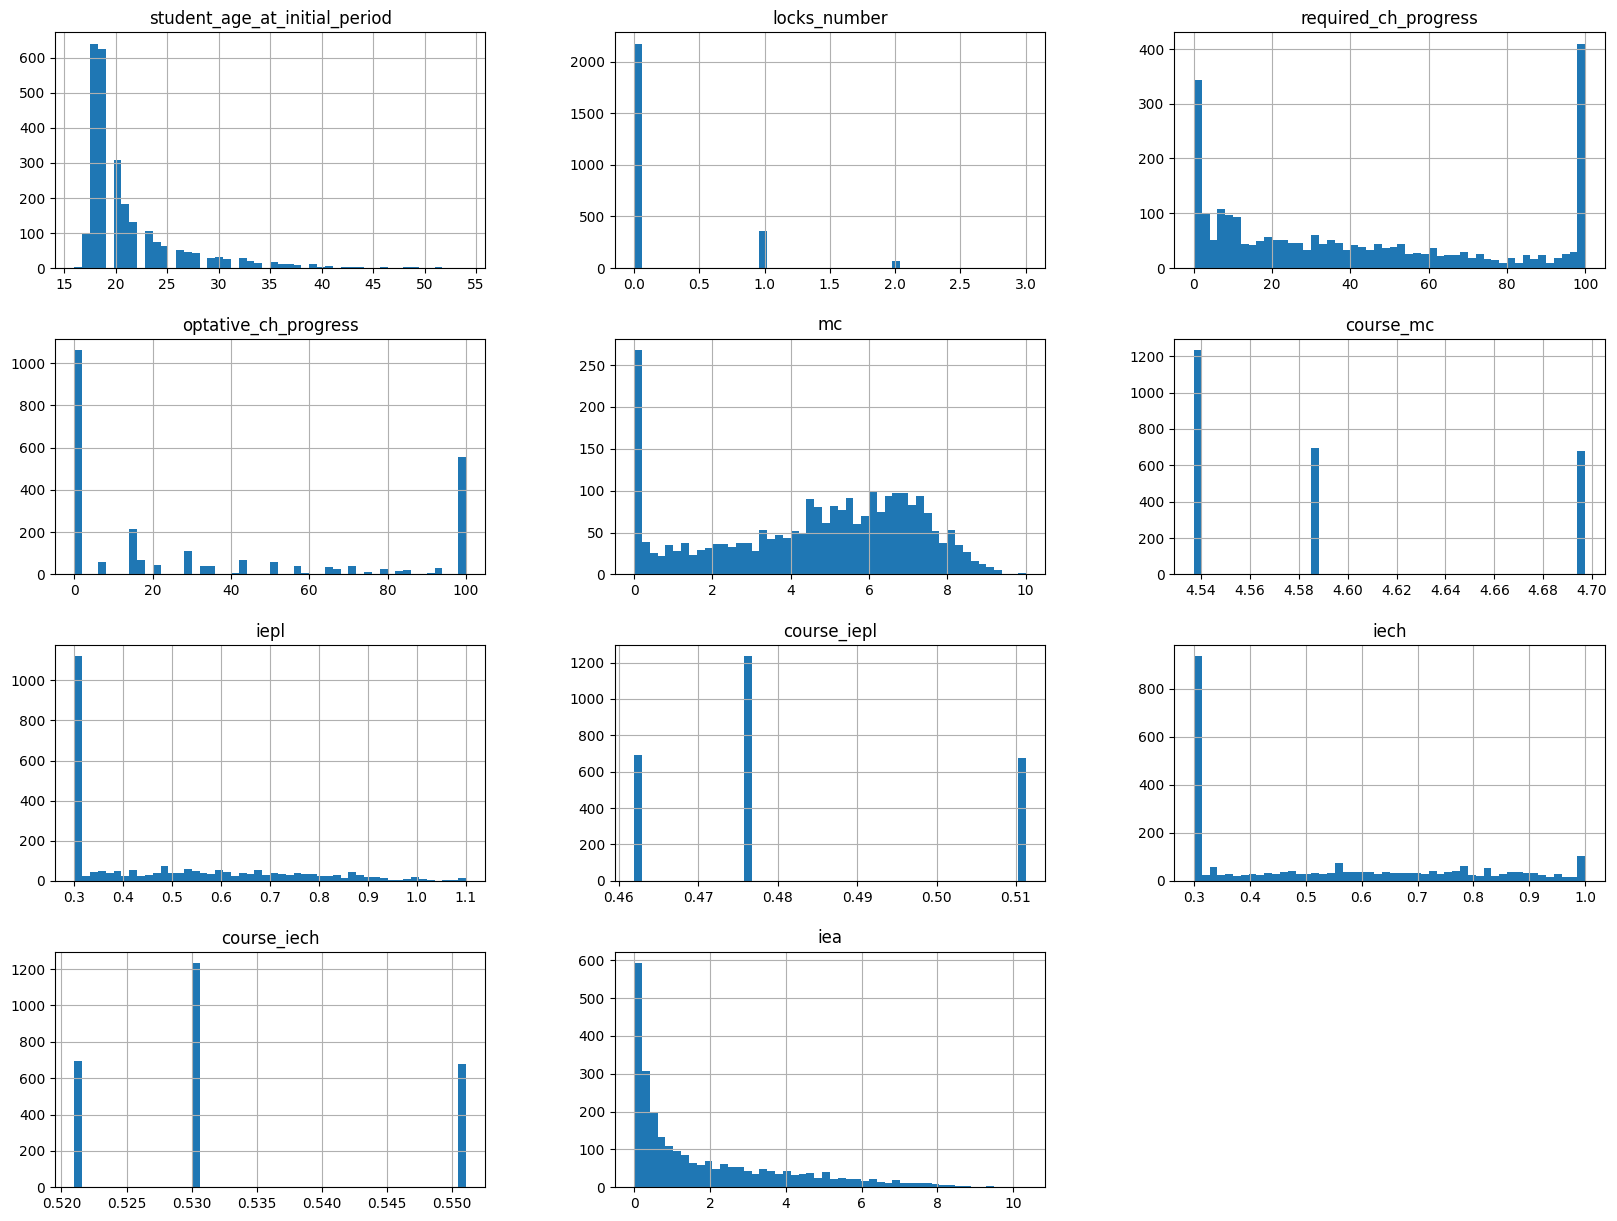

In [300]:
%matplotlib inline
import matplotlib as plt
evasao_reduzido.hist(bins=50, figsize=(20,15))
plt

#### Tentado entender quais são as opções de curriculum_status

In [301]:
filtro = evasao_reduzido[evasao_reduzido['curriculum_status'] == 'FORMANDO']
## filtro = evasao_reduzido[evasao_reduzido['curriculum_status'] == 'Ano/Período Letivo Inicial:']
## filtro = evasao_reduzido[evasao_reduzido['curriculum_status'] == 'Índices Acadêmicos']

filtro

,course_name,student_age_at_initial_period,birth_place,ingress_form,locks_number,required_ch_progress,optative_ch_progress,curriculum_status,mc,course_mc,iepl,course_iepl,iech,course_iech,iea
141,CIÊNCIA DA COMPUTAÇÃO,19,ARACAJU/SE,VESTIBULAR,0,100.000000,100.000000,FORMANDO,5.38,4.537049,0.583,0.476704,0.576,0.530138,1.8066
423,CIÊNCIA DA COMPUTAÇÃO,18,ARACAJU/SE,VESTIBULAR,0,100.000000,100.000000,FORMANDO,6.41,4.537049,0.653,0.476704,0.808,0.530138,3.3821
599,CIÊNCIA DA COMPUTAÇÃO,23,ARACAJU/SE,VESTIBULAR,0,100.000000,100.000000,FORMANDO,7.62,4.537049,0.604,0.476704,0.773,0.530138,3.5577
618,CIÊNCIA DA COMPUTAÇÃO,18,ARACAJU/SE,VESTIBULAR,0,97.368421,100.000000,FORMANDO,6.54,4.537049,0.742,0.476704,0.861,0.530138,4.1782
735,CIÊNCIA DA COMPUTAÇÃO,19,LAGARTO/SE,VESTIBULAR,0,92.105263,64.285714,FORMANDO,8.08,4.537049,0.897,0.476704,0.948,0.530138,6.8709
764,CIÊNCIA DA COMPUTAÇÃO,26,LAGARTO/SE,TRANSFERÊNCIA INTERNA,0,100.000000,100.000000,FORMANDO,5.83,4.537049,0.379,0.476704,0.535,0.530138,1.1821
1010,CIÊNCIA DA COMPUTAÇÃO,21,ARACAJU/SE,TRANSFERÊNCIA INTERNA,0,92.105263,100.000000,FORMANDO,8.06,4.537049,0.820,0.476704,0.944,0.530138,6.2391
1399,SISTEMAS DE INFORMAÇÃO,23,ARACAJU/SE,VESTIBULAR,0,100.000000,100.000000,FORMANDO,5.53,4.586078,0.455,0.461930,0.638,0.521000,1.6053
1453,SISTEMAS DE INFORMAÇÃO,22,ARACAJU/SE,VESTIBULAR,0,97.468354,91.666667,FORMANDO,5.69,4.586078,0.560,0.461930,0.619,0.521000,1.9724
1514,SISTEMAS DE INFORMAÇÃO,21,ARACAJU/SE,VESTIBULAR,0,100.000000,100.000000,FORMANDO,7.28,4.586078,0.785,0.461930,0.883,0.521000,5.0462


#### Como possuem ch_obg e ch_opt concluída acreditei que poderia agrupar para ter apenas dois possíveis resultados e assim criar meu label

In [302]:
# mapeamento = {
#     'TRANCADO': 'CANCELADO',
#     'FORMANDO': 'CONCLUÍDO',
#     'Índices Acadêmicos': 'CONCLUÍDO',
#     'Ano/Período Letivo Inicial:': 'CONCLUÍDO'
# }

# evasao_reduzido['curriculum_status'] = evasao_reduzido['curriculum_status'].replace(mapeamento)
# evasao_reduzido['curriculum_status'].value_counts()

### Porém vou tratar de outra forma, ao criar os labels, vou passar Trancado e Cancelado para o mesmo label de evasão e o resto vou definir que não evadiu

## Por um segundo pensei que a idade dele fosse relevante, mas não tem como afirmar a idade quando houve a evasao/conclusao

In [303]:
# from datetime import datetime
# ano_atual = datetime.now().year
# evasao_reduzido['age'] = evasao_reduzido['birthday'].apply(lambda x: ano_atual - int(x.split('-')[0]))

#### Agora eis a dúvida, eu posso treinar meu modelo com dados de alunos ativos? sendo que esse deveria ser meu label? dessa vez eu reduzi o conjunto para apenas os que Estivessem cancelado ou concluído

In [304]:
# evasao_whithout_ativos = evasao_reduzido[evasao_reduzido['curriculum_status'] != 'ATIVO'].copy()
# evasao_whithout_ativos.info()

#### (Adicionado após aula de dúvidas) Agora que entendi melhor o problema, os alunos que estão ativos não evadiram

In [305]:
# Categorizando o curriculum status para separar os alunos que evadiram(Cancelado ou Trancado)

evasao_reduzido['status_num'] = evasao_reduzido['curriculum_status'].apply(lambda x: 0 if x in {"CANCELADO"} else 1)
evasao_with_label = evasao_reduzido.drop(columns=['curriculum_status'])

In [306]:
evasao_with_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   course_name                    2603 non-null   object 
 1   student_age_at_initial_period  2603 non-null   int64  
 2   birth_place                    2600 non-null   object 
 3   ingress_form                   2603 non-null   object 
 4   locks_number                   2603 non-null   int64  
 5   required_ch_progress           2603 non-null   float64
 6   optative_ch_progress           2603 non-null   float64
 7   mc                             2603 non-null   float64
 8   course_mc                      2603 non-null   float64
 9   iepl                           2603 non-null   float64
 10  course_iepl                    2603 non-null   float64
 11  iech                           2603 non-null   float64
 12  course_iech                    2603 non-null   f

## Tentar um abordagem de seleção de modelo teste estratificada com a média do aluno, já que na minha visão está extremamente relacionado com a evasão

In [307]:
evasao_with_label['mc_cat'] = pd.cut(evasao_with_label['mc'], bins=[-1.0, 2.0, 4.0, 5.0, 7., 11.], labels=[1, 2, 3, 4, 5], right=True)

<Axes: >

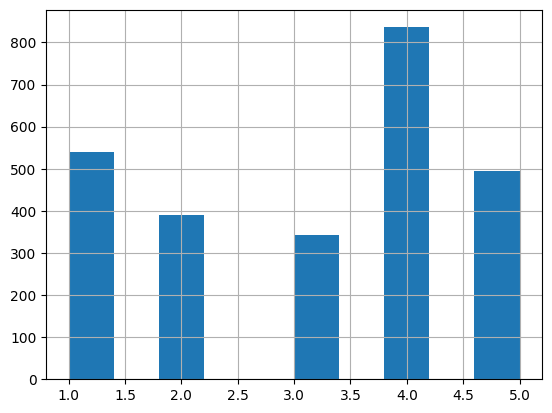

In [308]:
evasao_with_label['mc_cat'].hist()

In [309]:
from sklearn.model_selection import StratifiedShuffleSplit

# Como eu estou tratando de um recorte do dataset original preciso resetar os index
evasao_with_label = evasao_with_label.reset_index(drop=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(evasao_with_label, evasao_with_label['mc_cat']):
    strat_train_set = evasao_with_label.loc[train_index]
    strat_test_set = evasao_with_label.loc[test_index]

In [310]:
# Confirmando que existe uma boa divisão entre os estratos
strat_test_set['mc_cat'].value_counts() / len(strat_test_set)

mc_cat
4    0.320537
1    0.207294
5    0.190019
2    0.149712
3    0.132438
Name: count, dtype: float64

In [311]:
# Removendo a coluna de categoria para o dataset voltar ao estado original
for set_ in (strat_test_set, strat_train_set):
    set_.drop('mc_cat', axis=1, inplace=True)

In [312]:
## Fazendo uma copia do modelo de treino
evasion = strat_train_set.copy()

### Procurando por correlação utilizando o curriculum status através do status_num(0 significa cancelado, 1 significa concluído)

In [313]:
evasion_numeric = evasion.select_dtypes(include=["number"])

corr_matrix = evasion_numeric.corr()

corr_matrix["status_num"].sort_values(ascending=False)

status_num                       1.000000
iech                             0.577856
iepl                             0.517556
iea                              0.509750
mc                               0.477843
required_ch_progress             0.439484
optative_ch_progress             0.237832
course_mc                       -0.014020
course_iech                     -0.014967
course_iepl                     -0.014987
locks_number                    -0.154489
student_age_at_initial_period   -0.199262
Name: status_num, dtype: float64

In [314]:
# Vou remover alguns valores que não vejo sentido continuar usando, já que são equialentes ao course_name
columns_to_drop = ['course_iepl', 'course_mc', 'course_iech']
evasion = evasion.drop(columns=[col for col in columns_to_drop if col in evasion.columns])

### Plotar alguns valores promissores

array([[<Axes: xlabel='iech', ylabel='iech'>,
        <Axes: xlabel='iea', ylabel='iech'>,
        <Axes: xlabel='iepl', ylabel='iech'>,
        <Axes: xlabel='mc', ylabel='iech'>],
       [<Axes: xlabel='iech', ylabel='iea'>,
        <Axes: xlabel='iea', ylabel='iea'>,
        <Axes: xlabel='iepl', ylabel='iea'>,
        <Axes: xlabel='mc', ylabel='iea'>],
       [<Axes: xlabel='iech', ylabel='iepl'>,
        <Axes: xlabel='iea', ylabel='iepl'>,
        <Axes: xlabel='iepl', ylabel='iepl'>,
        <Axes: xlabel='mc', ylabel='iepl'>],
       [<Axes: xlabel='iech', ylabel='mc'>,
        <Axes: xlabel='iea', ylabel='mc'>,
        <Axes: xlabel='iepl', ylabel='mc'>,
        <Axes: xlabel='mc', ylabel='mc'>]], dtype=object)

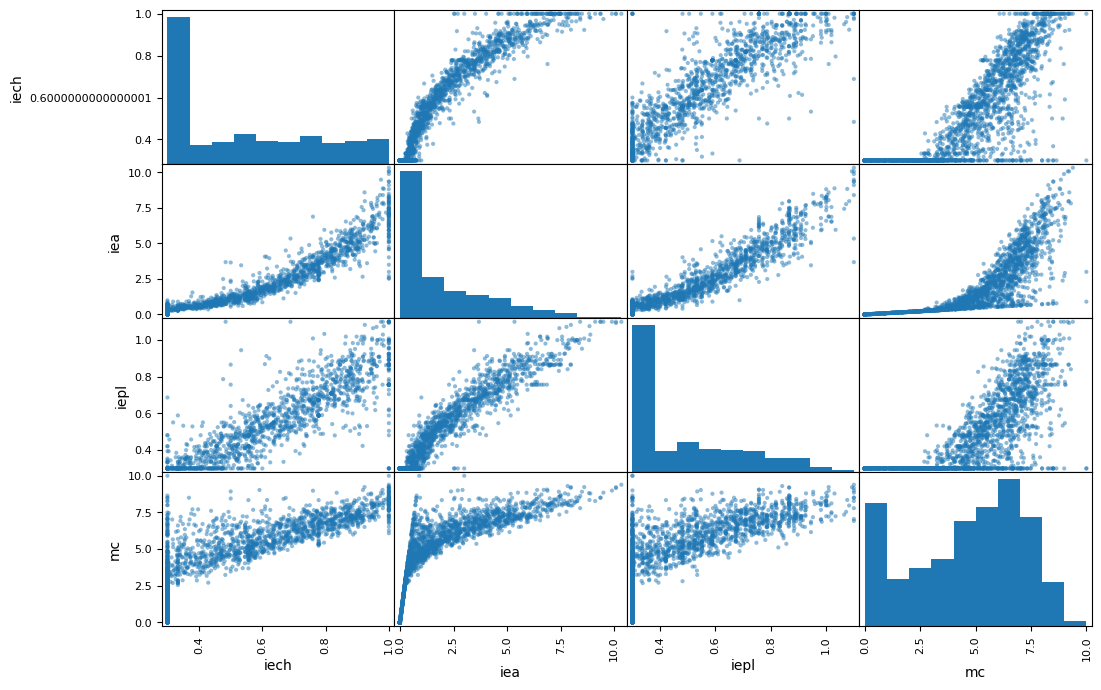

In [315]:
from pandas.plotting import scatter_matrix

attributes = ['iech', 'iea', 'iepl', 'mc']
scatter_matrix(evasion[attributes], figsize=(12, 8))

<Axes: xlabel='status_num', ylabel='mc'>

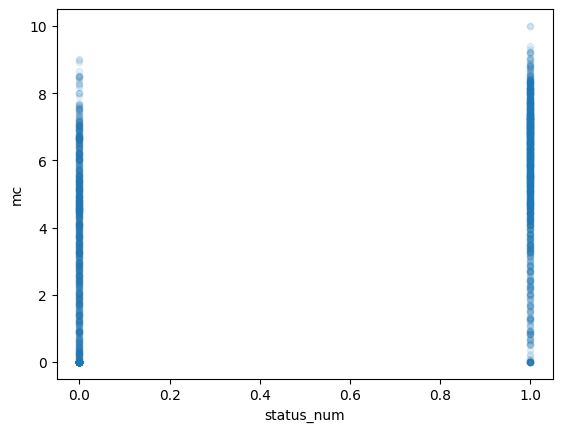

In [316]:
# Alunos que não evadem se acumulam com MC > 4, enquanto os que evdem se acumulam com MC < 7
evasion.plot(kind='scatter', x='status_num', y='mc', alpha=0.1)

## Preparando os dados para algoritmos de ML

In [317]:
# Removendo a coluna de label já que não vamos alterar ela
evasion = strat_train_set.drop('status_num', axis=1)
evasion_labels = strat_train_set['status_num'].copy()

In [318]:
# preenchendo os birth_place que foram nulos
evasion['birth_place'] = evasion['birth_place'].fillna('Desconhecido')

print(evasion['birth_place'].isna().sum())

0


#### Convertendo valores categóricos

In [319]:
# Separando os valores categórios e os númericos
evasion_cat = evasion[['course_name', 'birth_place', 'ingress_form']]
evasion_num = evasion.drop(['course_name', 'birth_place', 'ingress_form'], axis=1)

#### Criando as funções para transformações categóricas e númericas serem aplicadas em um pipeline

In [320]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Transformação categórica
cat_encoder = OneHotEncoder()
# evasion_cat_1hot = cat_encoder.fit_transform(evasion_cat)
# evasion_cat_1hot

# Númerica
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

# evasion_num_tr = num_pipeline.fit_transform(evasion_num)

### Utilizando um transformer para valores categóricos e númericos

In [321]:
from sklearn.compose import ColumnTransformer

num_attribs = list(evasion_num)
cat_attribs = list(evasion_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), 
    ("cat", OneHotEncoder(), cat_attribs),
])

evasion_prepared = full_pipeline.fit_transform(evasion)

### Selecionar e treinar um modelo, vou começar testando o comportamento de um modelo de regressão linear em um problema de classificação

In [322]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(evasion_prepared, evasion_labels)

LinearRegression()

In [323]:
some_data = evasion.iloc[:5]
some_labels = evasion_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 0.2381932   0.99978265  0.9923838  -0.0037323   0.79103012]
Labels: [0, 1, 1, 0, 1]


### Como esperado, as predições são valores, para avilar perfomance em modelos de regressão linear é utilizado o Root Mean Square Error

In [324]:
from sklearn.metrics import mean_squared_error
evasion_predictions = lin_reg.predict(evasion_prepared)
lin_mse = mean_squared_error(evasion_labels, evasion_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(0.37235882157292577)

## Agora vamos testar modelos de classificação

##### Classificação baseada em regressão linear LogisticRegression

In [325]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lin_log = LogisticRegression()
lin_log.fit(evasion_prepared, evasion_labels)

LogisticRegression()

In [326]:
some_data = evasion.iloc[:500]
some_labels = evasion_labels.iloc[:500]
some_data_prepared = full_pipeline.transform(some_data)
predictions = lin_log.predict(some_data_prepared)
regressao_accuracy = accuracy_score(some_labels, predictions)
print(regressao_accuracy)

0.78


#### Utilizando árvores de decisão

In [327]:
from sklearn.tree import DecisionTreeClassifier


tree_class = DecisionTreeClassifier()
tree_class.fit(evasion_prepared, evasion_labels)

DecisionTreeClassifier()

In [328]:
predictions = tree_class.predict(evasion_prepared)
tree_accuracy = accuracy_score(evasion_labels, predictions)

print(f"Accuracy: {tree_accuracy:f}")

Accuracy: 0.999520


#### Utilizando florestas de decisão

In [329]:
from sklearn.ensemble import RandomForestClassifier

forest_class = RandomForestClassifier(n_estimators=10, random_state=42)
forest_class.fit(evasion_prepared, evasion_labels)

RandomForestClassifier(n_estimators=10, random_state=42)

In [330]:
some_data = evasion.iloc[:500]
some_labels = evasion_labels.iloc[:500]
some_data_prepared = full_pipeline.transform(some_data)
forest_predictions = forest_class.predict(some_data_prepared)

forest_accuracy = accuracy_score(some_labels, forest_predictions)

print(f"Accuracy: {forest_accuracy:f}")
print("Predictions:", predictions[490:])
print("Labels:", list(some_labels[490:]))


Accuracy: 0.990000
Predictions: [1 1 0 ... 1 0 0]
Labels: [1, 1, 0, 1, 0, 1, 0, 1, 1, 1]


#### Utilizando modelo de k-neighbors

In [331]:
from sklearn.neighbors import KNeighborsClassifier

k_neigh = KNeighborsClassifier(n_neighbors=5)
k_neigh.fit(evasion_prepared, evasion_labels)

KNeighborsClassifier()

In [332]:
some_data = evasion.iloc[:500]
some_labels = evasion_labels.iloc[:500]
some_data_prepared = full_pipeline.transform(some_data)
predictions = k_neigh.predict(some_data_prepared)
k_accuracy = accuracy_score(some_labels, predictions)
print(k_accuracy)

0.848


### comparação do resultados dos modelos

In [333]:
print(f'regressao_accuracy:', regressao_accuracy)
print(f'tree_accuracy:', tree_accuracy)
print(f'forest_accuracy:', forest_accuracy)
print(f'k accuracy:', k_accuracy)

regressao_accuracy: 0.78
tree_accuracy: 0.9995196926032661
forest_accuracy: 0.99
k accuracy: 0.848


### Para continuar a atividade foi ajustado o que se considera evasão, agora Curriculum_status TRANCADO não é considerado evasão

## Implementando cálculo de desempenho

#### Medindo utilizando validação cruzada K-fold, como no caso a seguir o K = 3, vamos separar o modelo em 3 e para cada parte o modelo é treinado usando as outras

- esse tipo de avaliação é muito bom em datasets pequenos
- como lida com precisão, pode não ser a melhor solução para problemas de classificação em datasets distorcidos(quando algumas classes são bem mais frequentes que outras)

In [334]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_class, evasion_prepared, evasion_labels, scoring="accuracy", cv=3)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", round(scores.mean(), 2))
    print("Std:", round(scores.std(), 8))

display_scores(scores)

Scores: [0.74351585 0.75936599 0.74207493]
Mean: 0.75
Std: 0.00783358


### Matriz de Confusão

- É uma ferramenta importante para entender onde o modelo está errando
- A ideia é contar o número de vezes que o modelo classificou uma instância da classe A como B
- Surge os termos como Verdadeiro Positivo, Falso Positivo, Verdadeiro Negativo e Falso Negativo

In [335]:
## Agora retorna as previsões no lugar dos scores
from sklearn.model_selection import cross_val_predict

labels_train_pred = cross_val_predict(tree_class, evasion_prepared, evasion_labels, cv=3)

In [336]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(evasion_labels, labels_train_pred)

print(cm)

[[680 274]
 [264 864]]


Criando um heatmap com o seaborn para facilitar o entendimento da Matriz de confusão

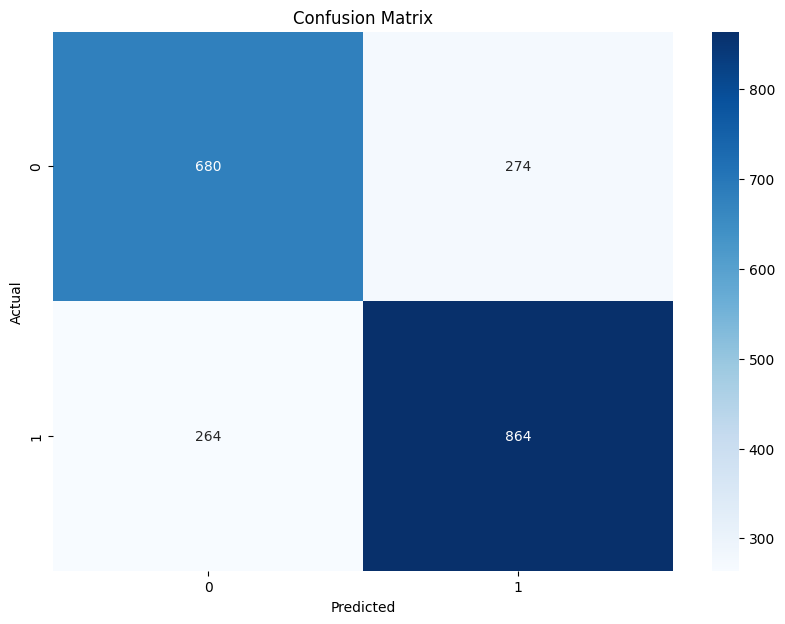

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### F1, Precisão e Recall

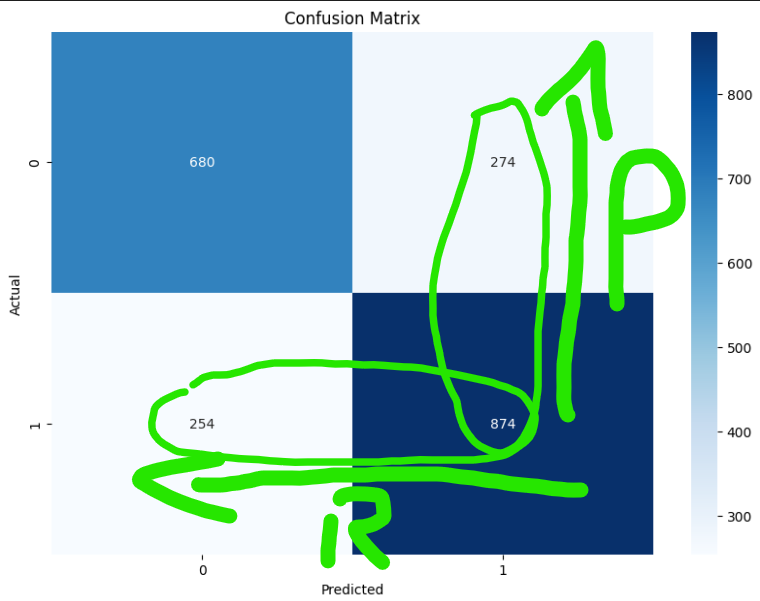

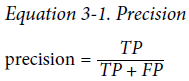
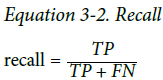

In [338]:
from sklearn.metrics import precision_score, recall_score

precision_score(evasion_labels, labels_train_pred)


0.7592267135325131

In [339]:
recall_score(evasion_labels, labels_train_pred)

0.7659574468085106

### O F1-Score combina Precisão e Recall em uma única métrica

Se precisar de um jeito simples de comparar dois classificadores, o F1 é recomendado porque da mais peso para valores menores, ou seja, um F1-Score só vai ser alto se ambos, Precisão e Recall, forem altos.

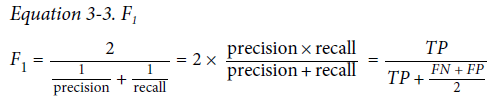

In [340]:
from sklearn.metrics import f1_score
f1_score(evasion_labels, labels_train_pred)

0.7625772285966461

O F1-Score favorece modelos com Precisão e Recall similares. Porém dependendo do contexto pode ser que não seja o ideal, As vezes o mais importante é a precisão, e as vezes o mais importante é o Recall.
> Infelizmente não é possível ter os dois, aumentar a precisão reduz o recall e vice versa.

### Precision/Recall Tradeoff

Para cada instância é atribuído um score, se o score for maior que o Decision Threshold(limite de decisão, onde o modelo compara para classificar) ele atribui a instância para a classe positiva, do contrário para a negativa.

O valor desse Threshold é onde comparamos o trandeoff entre precision e recall. Quanto mais baixo o valor, maior a chance do modelo encontrar corretamente os valores alvos, porém nesse meio tempo ele pode confudir outros valores e classificá-los como alvo, logo aumentando o Recall porém Diminuindo a precisão. Do contrário se colocarmos um valor do threshold muito grande, podemos aumentar a precisão porém o recall será baixo

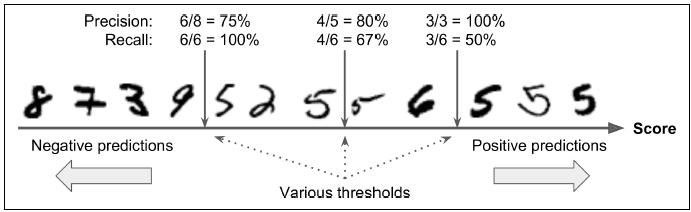

In [341]:
## utilizando a cross_val_predict() novamente porém mudando o retorno para os scores no lugar das predições
## como o DecisionTreeClassifier não possui a função de decisão, utilizei o LogisticRegression

labels_scores = cross_val_predict(lin_log, evasion_prepared, evasion_labels, cv=3, method="decision_function")

In [342]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(evasion_labels, labels_scores)

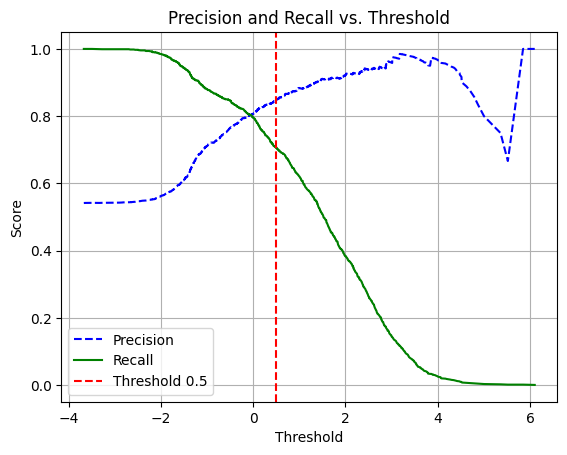

In [343]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Precision and Recall vs. Threshold")
    plt.legend(loc="best")
    plt.grid(True)
    plt.axvline(x=0.5, color='r', linestyle='--', label='Threshold 0.5')  # Destacando o limiar 0.5
    plt.legend()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

> A curva de precisão é mais acidentada que a de Recall porque a precisão pode diminuir quando o threshold sobe(No geral o comportamento é subir)

### A curva ROC

- Ferramenta Comum em classificadores binários(nosso caso)
- Plota a TPR(True Positive Rate, outro nome para Recall) contra a FPR(False Positive Rate, Razão de instâncias negativas que foram incorretamente classificadas como positivas - Falso Alarme)
> Logo a curva roc plota: sensitividade(recall) x 1 - especificidade

In [344]:
# para plotar a curva precisa computar a TPR e a FPR para varios thresholds
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(evasion_labels, labels_scores)

/tmp/ipykernel_7345/271257440.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


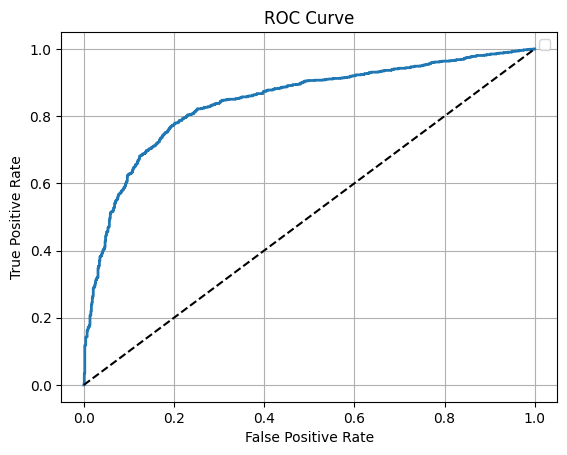

In [345]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="best")
    plt.grid(True)

plot_roc_curve(fpr, tpr)
plt.show()

- Novamente temos um tradeoff, quanto maior o TPR(recall), maior a ocorrência de Falsos Positivos.
>
- A linha pontilhada representa a curva ROC de um classificador totalmente aleatório, quanto mais afastado da curva estiver melhor o classificador.(na direção superior esquerda)

In [346]:
## AUC SCORE -> uma 'nota' para o desenho da curva, quanto mais próximo de 1 melhor
from sklearn.metrics import roc_auc_score

roc_auc_score(evasion_labels, labels_scores)

np.float64(0.8435948116924632)

### Quando escolher curva ROC e quando escolher a curva Precision/Recall?
Curva PR -> Quando a classe Positiva for Rara ou quando o problema se importar mais com os Falsos Positivos
- Detecção de Fraudes (poucos casos positivos)
- Diagnóstico de doenças raras
- Monitoramento de falhas em sistemas
>
Curva ROC -> Classes balanceadas e falsos positivos e falsos negativos têm impacto parecido

### Comparando o modelo de Logisitic Regression com o RandomForest

In [347]:
## criando os scores do random forest
labels_probas_forest = cross_val_predict(forest_class, evasion_prepared, evasion_labels, cv=3, method='predict_proba')

In [348]:
## porem precisa de scores e não probabilidades, logo vamos usar a probabilidade da classe positiva como score
labels_scores_forest = labels_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(evasion_labels, labels_scores_forest)

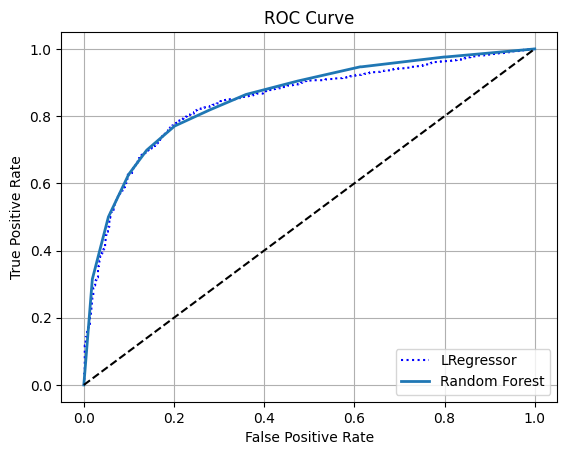

In [349]:
plt.plot(fpr, tpr, 'b:', label='LRegressor')
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

Scores do forest classifier

In [350]:
## auc score da forest
roc_auc_score(evasion_labels, labels_scores_forest)

np.float64(0.8514058016265964)

In [351]:
forest_train_Pred = cross_val_predict(forest_class, evasion_prepared, evasion_labels, cv=3)

In [352]:
# Precisão
precision_score(evasion_labels, forest_train_Pred)

0.819038642789821

In [353]:
# Recall
recall_score(evasion_labels, labels_train_pred)

0.7659574468085106

### Análise de erro

após encontrar um modelo promissor para encontrar maneiras de melhorar, um caminho é analisar os erros que ele fez

In [354]:
label_train_pred = cross_val_predict(forest_class, evasion_prepared, evasion_labels, cv=3)
conf_mx = confusion_matrix(evasion_labels, label_train_pred)
conf_mx

array([[762, 192],
       [259, 869]])

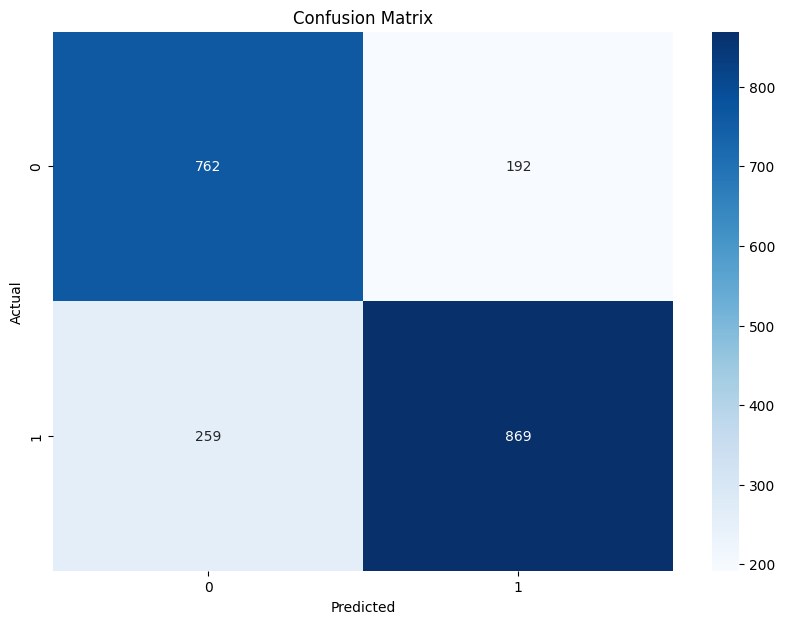

In [355]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_mx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [356]:
evasion_labels.head()

164     0
607     1
901     1
50      0
2561    1
Name: status_num, dtype: int64

In [357]:
evasion_labels.tail()

1276    0
1000    0
1748    1
1492    0
1255    0
Name: status_num, dtype: int64

In [358]:
label_train_pred

array([0, 1, 1, ..., 0, 0, 0], shape=(2082,))

In [359]:
evasion_labels.info()

<class 'pandas.core.series.Series'>
Index: 2082 entries, 164 to 1255
Series name: status_num
Non-Null Count  Dtype
--------------  -----
2082 non-null   int64
dtypes: int64(1)
memory usage: 32.5 KB


In [360]:
linha_1748 = evasao.loc[1748]
print(linha_1748)

curriculum_id                                      3342
student_id                                         3067
centro                                             CCET
department_name                                   DCOMP
course_name                      SISTEMAS DE INFORMAÇÃO
student_age_at_initial_period                        19
birthday                                     2001-11-14
birth_place                                ITABAIANA/SE
ingress_form                                 VESTIBULAR
locks_number                                          1
required_ch_progress                          18.987342
optative_ch_progress                                0.0
curriculum_status                                 ATIVO
leaving_reason                                      NaN
mc                                                 3.78
course_mc                                      4.586078
iepl                                              0.361
course_iepl                                     

In [361]:
print(evasion_labels.index)
print(range(len(label_train_pred)))

Index([ 164,  607,  901,   50, 2561, 2372,  339, 1464,  756, 2047,
       ...
       1611,   48,  308, 2543,  898, 1276, 1000, 1748, 1492, 1255],
      dtype='int64', length=2082)
range(0, 2082)


In [362]:
diferencas = label_train_pred != np.array(evasion_labels)

quantidade_diferencas = np.sum(diferencas)

print(quantidade_diferencas)

451


In [363]:
print(len(evasion_labels))
print(len(label_train_pred))


2082
2082


In [364]:
falsos_negativos_matriz = conf_mx[1, 0]
print(f"Número de falsos negativos: {falsos_negativos_matriz}")

Número de falsos negativos: 259


In [365]:
falsos_negativos = (evasion_labels == 1) &  (label_train_pred == 0)
print(f"Número de falsos negativos: {falsos_negativos.sum()}")


Número de falsos negativos: 259


In [366]:
predicoes_series = pd.Series(label_train_pred, index=evasion_labels.index)

In [367]:
falsos_negativos = (evasion_labels == 1) &  (predicoes_series == 0)
print(f"Número de falsos negativos: {falsos_negativos.sum()}")

Número de falsos negativos: 259


In [368]:
indices_fn = evasion_labels.index[falsos_negativos]
tabela_falsos_negativos = evasao.loc[indices_fn]

In [369]:
tabela_falsos_negativos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259 entries, 833 to 1748
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   curriculum_id                  259 non-null    int64  
 1   student_id                     259 non-null    int64  
 2   centro                         259 non-null    object 
 3   department_name                259 non-null    object 
 4   course_name                    259 non-null    object 
 5   student_age_at_initial_period  259 non-null    int64  
 6   birthday                       259 non-null    object 
 7   birth_place                    259 non-null    object 
 8   ingress_form                   259 non-null    object 
 9   locks_number                   259 non-null    int64  
 10  required_ch_progress           259 non-null    float64
 11  optative_ch_progress           259 non-null    float64
 12  curriculum_status              259 non-null    objec

In [371]:
tabela_falsos_negativos.head()

,curriculum_id,student_id,centro,department_name,course_name,student_age_at_initial_period,birthday,birth_place,ingress_form,locks_number,required_ch_progress,optative_ch_progress,curriculum_status,leaving_reason,mc,course_mc,iepl,course_iepl,iech,course_iech,iea
833,3017,2794,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,19,2000-06-06,ARACAJU/SE,VESTIBULAR,0,21.052632,28.571429,ATIVO,NaN,4.42,4.537049,0.336,0.476704,0.526,0.530138,0.7812
2078,1873,1256,CCET,DCOMP,ENGENHARIA DE COMPUTAÇÃO,20,1993-05-03,ITABAIANA/SE,TRANSFERÊNCIA INTERNA,1,60.416667,100.000000,ATIVO,NaN,3.51,4.697231,0.300,0.511211,0.378,0.551049,0.3980
1136,3730,3410,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,20,2002-09-29,ITABAIANA/SE,VESTIBULAR,0,1.315789,0.000000,ATIVO,NaN,1.49,4.537049,0.300,0.476704,0.300,0.530138,0.1341
1895,3847,3524,CCET,DCOMP,SISTEMAS DE INFORMAÇÃO,20,2002-09-16,ARACAJU/SE,VESTIBULAR,0,6.329114,0.000000,ATIVO,NaN,6.24,4.586078,0.481,0.461930,0.455,0.521000,1.3657
2513,3567,3267,CCET,DCOMP,ENGENHARIA DE COMPUTAÇÃO,27,1994-07-17,ARACAJU/SE,VESTIBULAR,0,3.125000,0.000000,ATIVO,NaN,1.67,4.697231,0.300,0.511211,0.300,0.551049,0.1503


In [372]:
tabela_falsos_negativos.value_counts('curriculum_status')

curriculum_status
ATIVO        226
TRANCADO      28
CONCLUÍDO      5
Name: count, dtype: int64

In [370]:
tabela_falsos_negativos.describe()

,curriculum_id,student_id,student_age_at_initial_period,locks_number,required_ch_progress,optative_ch_progress,mc,course_mc,iepl,course_iepl,iech,course_iech,iea
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,3116.324324,2727.687259,22.328185,0.324324,30.661372,25.275786,3.407799,4.597644,0.360409,0.483693,0.397861,0.534329,0.695920
std,608.310186,686.134181,6.134508,0.566359,27.552402,33.694591,2.078626,0.068908,0.111463,0.019184,0.140797,0.011676,0.970278
min,555.000000,385.000000,17.000000,0.000000,0.000000,0.000000,0.000000,4.537049,0.300000,0.461930,0.300000,0.521000,0.000000
25%,2797.000000,2406.000000,19.000000,0.000000,7.443302,0.000000,1.740000,4.537049,0.300000,0.476704,0.300000,0.530138,0.156600
50%,3246.000000,2869.000000,20.000000,0.000000,21.052632,14.285714,3.470000,4.586078,0.300000,0.476704,0.316000,0.530138,0.366300
75%,3571.500000,3262.500000,23.000000,1.000000,47.916667,35.714286,4.730000,4.697231,0.368000,0.511211,0.460500,0.551049,0.843500
max,3925.000000,3589.000000,51.000000,3.000000,100.000000,100.000000,10.000000,4.697231,0.979000,0.511211,0.978000,0.551049,7.812900
